In [ ]:
Janvi Agarwal
SE21UARI055
AI-1

In [20]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.corpus import stopwords
import random
#others are imported as and when used 

In [2]:
from nltk.corpus import reuters

In [3]:
print(reuters)

<CategorizedPlaintextCorpusReader in '.../corpora/reuters' (not loaded yet)>


In [4]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/janviagarwal/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [5]:
#to retrieve some text
file_id='test/14826'
file_text=reuters.raw(file_id)
print(file_text[:1000])

ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
  said they would virtually halt exports

In [6]:
from nltk.tokenize import word_tokenize
document_text = reuters.raw('test/14826')
tokens = word_tokenize(document_text)
print(tokens)

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U.S.-JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U.S.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'s", 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.', 'They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U.S.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U.S.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.', 'But', 'some', 'exporters', 'said', 'that', 'while', 'the', 'conflict', 'would', 'hurt', 'them', 'in', 'the', 'long-run', ',', 'in', 'the', 'short-term', 'Tokyo', "'s", 'loss', 'might', 'be', 'their', 'gain', '.', 'The', 'U.S.', 'Has', 'said', 'it', 'will', 'impose', '300', 'mln', 'dlrs', 'of', 'tariffs', 'on', 'imports', 'of', 'Japanese', 'electronics', 'good

In [7]:
lowercase_tokens = [token.lower() for token in tokens]
print(lowercase_tokens)

['asian', 'exporters', 'fear', 'damage', 'from', 'u.s.-japan', 'rift', 'mounting', 'trade', 'friction', 'between', 'the', 'u.s.', 'and', 'japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'asia', "'s", 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.', 'they', 'told', 'reuter', 'correspondents', 'in', 'asian', 'capitals', 'a', 'u.s.', 'move', 'against', 'japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'u.s.', 'and', 'lead', 'to', 'curbs', 'on', 'american', 'imports', 'of', 'their', 'products', '.', 'but', 'some', 'exporters', 'said', 'that', 'while', 'the', 'conflict', 'would', 'hurt', 'them', 'in', 'the', 'long-run', ',', 'in', 'the', 'short-term', 'tokyo', "'s", 'loss', 'might', 'be', 'their', 'gain', '.', 'the', 'u.s.', 'has', 'said', 'it', 'will', 'impose', '300', 'mln', 'dlrs', 'of', 'tariffs', 'on', 'imports', 'of', 'japanese', 'electronics', 'good

In [8]:
from nltk import pos_tag
pos_tags = pos_tag(tokens)
print(pos_tags)

[('ASIAN', 'NNP'), ('EXPORTERS', 'NNP'), ('FEAR', 'NNP'), ('DAMAGE', 'NNP'), ('FROM', 'NNP'), ('U.S.-JAPAN', 'NNP'), ('RIFT', 'NNP'), ('Mounting', 'NNP'), ('trade', 'NN'), ('friction', 'NN'), ('between', 'IN'), ('the', 'DT'), ('U.S.', 'NNP'), ('And', 'CC'), ('Japan', 'NNP'), ('has', 'VBZ'), ('raised', 'VBN'), ('fears', 'NNS'), ('among', 'IN'), ('many', 'JJ'), ('of', 'IN'), ('Asia', 'NNP'), ("'s", 'POS'), ('exporting', 'VBG'), ('nations', 'NNS'), ('that', 'IN'), ('the', 'DT'), ('row', 'NN'), ('could', 'MD'), ('inflict', 'VB'), ('far-reaching', 'JJ'), ('economic', 'JJ'), ('damage', 'NN'), (',', ','), ('businessmen', 'NNS'), ('and', 'CC'), ('officials', 'NNS'), ('said', 'VBD'), ('.', '.'), ('They', 'PRP'), ('told', 'VBD'), ('Reuter', 'NNP'), ('correspondents', 'NNS'), ('in', 'IN'), ('Asian', 'JJ'), ('capitals', 'NNS'), ('a', 'DT'), ('U.S.', 'NNP'), ('Move', 'NNP'), ('against', 'IN'), ('Japan', 'NNP'), ('might', 'MD'), ('boost', 'VB'), ('protectionist', 'JJ'), ('sentiment', 'NN'), ('in', '

In [9]:
from nltk.stem.porter import PorterStemmer
pstemmer=PorterStemmer()

In [10]:
stemmed_tokens = [pstemmer.stem(token) for token in tokens]
print(stemmed_tokens)

['asian', 'export', 'fear', 'damag', 'from', 'u.s.-japan', 'rift', 'mount', 'trade', 'friction', 'between', 'the', 'u.s.', 'and', 'japan', 'ha', 'rais', 'fear', 'among', 'mani', 'of', 'asia', "'s", 'export', 'nation', 'that', 'the', 'row', 'could', 'inflict', 'far-reach', 'econom', 'damag', ',', 'businessmen', 'and', 'offici', 'said', '.', 'they', 'told', 'reuter', 'correspond', 'in', 'asian', 'capit', 'a', 'u.s.', 'move', 'against', 'japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'u.s.', 'and', 'lead', 'to', 'curb', 'on', 'american', 'import', 'of', 'their', 'product', '.', 'but', 'some', 'export', 'said', 'that', 'while', 'the', 'conflict', 'would', 'hurt', 'them', 'in', 'the', 'long-run', ',', 'in', 'the', 'short-term', 'tokyo', "'s", 'loss', 'might', 'be', 'their', 'gain', '.', 'the', 'u.s.', 'ha', 'said', 'it', 'will', 'impos', '300', 'mln', 'dlr', 'of', 'tariff', 'on', 'import', 'of', 'japanes', 'electron', 'good', 'on', 'april', '17', ',', 'in', 'retali', '

In [25]:
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]
print(lemmatized_tokens)

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U.S.-JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U.S.', 'And', 'Japan', 'ha', 'raised', 'fear', 'among', 'many', 'of', 'Asia', "'s", 'exporting', 'nation', 'that', 'the', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'official', 'said', '.', 'They', 'told', 'Reuter', 'correspondent', 'in', 'Asian', 'capital', 'a', 'U.S.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U.S.', 'And', 'lead', 'to', 'curb', 'on', 'American', 'import', 'of', 'their', 'product', '.', 'But', 'some', 'exporter', 'said', 'that', 'while', 'the', 'conflict', 'would', 'hurt', 'them', 'in', 'the', 'long-run', ',', 'in', 'the', 'short-term', 'Tokyo', "'s", 'loss', 'might', 'be', 'their', 'gain', '.', 'The', 'U.S.', 'Has', 'said', 'it', 'will', 'impose', '300', 'mln', 'dlrs', 'of', 'tariff', 'on', 'import', 'of', 'Japanese', 'electronics', 'good', 'on', 'Ap

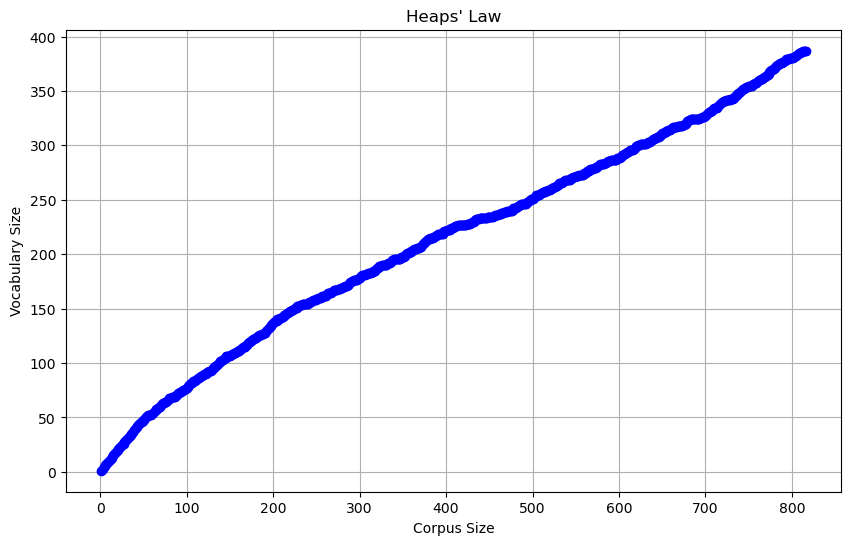

In [11]:
corpus_sizes = []
vocabulary_sizes = []

for i in range(1, len(tokens) + 1):
    subset_tokens = tokens[:i]
    vocabulary_size = len(set(subset_tokens))
    
    corpus_sizes.append(i)
    vocabulary_sizes.append(vocabulary_size)

plt.figure(figsize=(10, 6))
plt.plot(corpus_sizes, vocabulary_sizes, marker='o', linestyle='-', color='b')
plt.xlabel("Corpus Size")
plt.ylabel("Vocabulary Size")
plt.title("Heaps' Law")
plt.grid(True)
plt.show()

In [27]:
from nltk import FreqDist

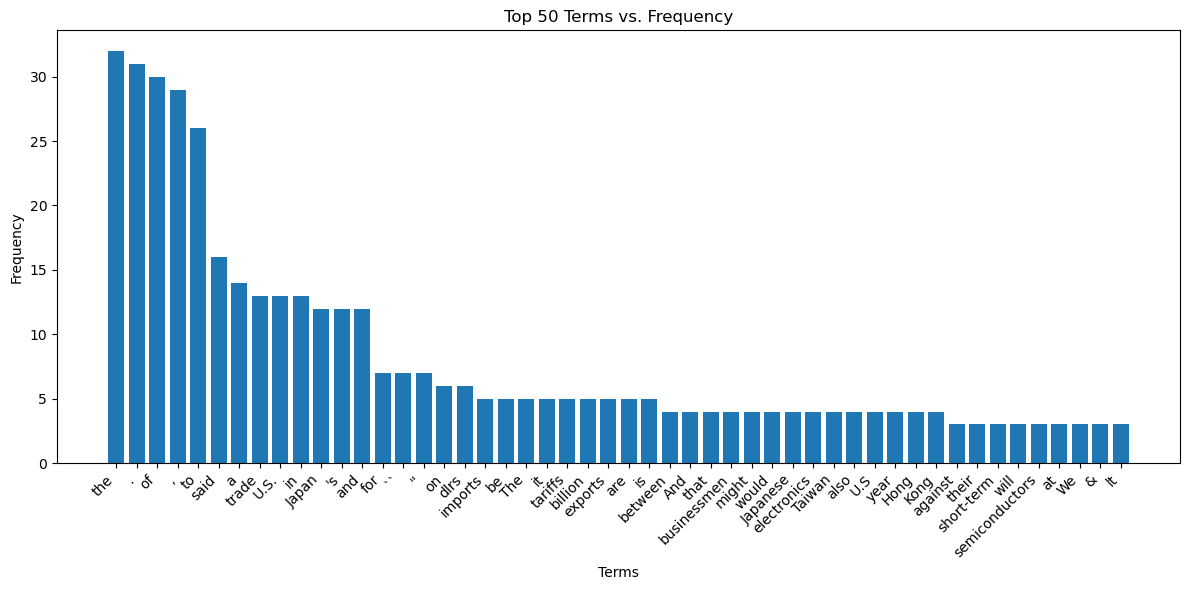

In [12]:
from collections import Counter

term_counts = Counter(tokens)

terms = list(term_counts.keys())
counts = list(term_counts.values())
sorted_terms, sorted_counts = zip(*sorted(zip(terms, counts), key=lambda x: x[1], reverse=True))

N = 50
plt.figure(figsize=(12, 6))
plt.bar(sorted_terms[:N], sorted_counts[:N])
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Top {} Terms vs. Frequency'.format(N))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Estimated Zipf's exponent (slope): -0.66


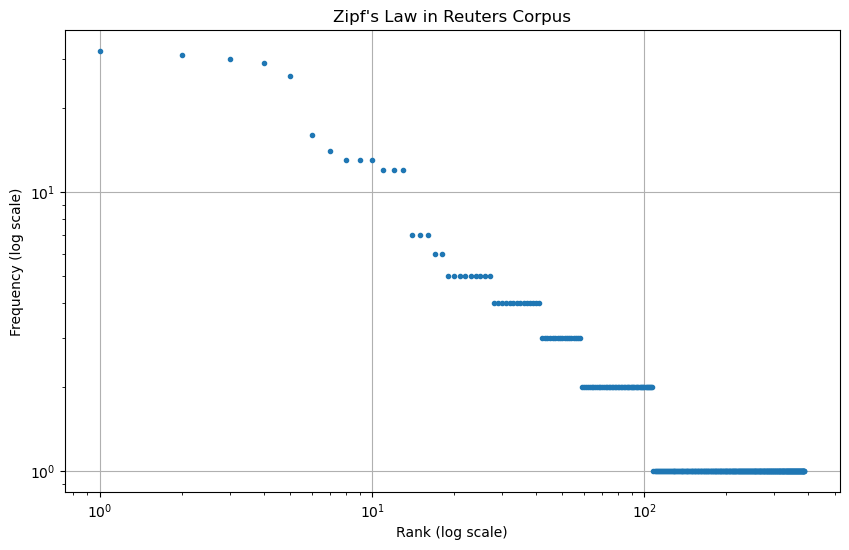

In [13]:
term_counts = Counter(tokens)
sorted_terms, sorted_counts = zip(*sorted(term_counts.items(), key=lambda x: x[1], reverse=True))

ranks = np.arange(1, len(sorted_terms) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_counts, marker='.', linestyle='none')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Zipf\'s Law in Reuters Corpus')
plt.grid(True)

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(np.log(ranks), np.log(sorted_counts))
print(f"Estimated Zipf's exponent (slope): {slope:.2f}")

plt.show()

In [14]:
stop_words = set(stopwords.words('english'))

filtered_corpus = []
for token in tokens:
    words = word_tokenize(" ".join(tokens))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_corpus.append(filtered_words)

In [15]:
from nltk.util import ngrams
unigrams = list(ngrams(tokens, 1))
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

unigram_freq = Counter(unigrams)
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

print("Top 10 Unigrams:")
print(unigram_freq.most_common(10))

print("\nTop 10 Bigrams:")
print(bigram_freq.most_common(10))

print("\nTop 10 Trigrams:")
print(trigram_freq.most_common(10))

Top 10 Unigrams:
[(('the',), 32), (('.',), 31), (('of',), 30), ((',',), 29), (('to',), 26), (('said',), 16), (('a',), 14), (('trade',), 13), (('U.S.',), 13), (('in',), 13)]

Top 10 Bigrams:
[(('.', '``'), 7), ((',', "''"), 7), (('the', 'U.S.'), 6), (('.', 'The'), 5), (('of', 'the'), 5), (('billion', 'dlrs'), 5), (("''", 'said'), 5), (('U.S.', 'And'), 4), (('in', 'the'), 4), (('U.S', '.'), 4)]

Top 10 Trigrams:
[((',', "''", 'said'), 5), (('the', 'U.S.', 'And'), 4), (('between', 'the', 'U.S.'), 3), (('U.S.', 'And', 'Japan'), 3), (('.', '``', 'We'), 3), (('&', 'lt', ';'), 3), (('the', 'U.S', '.'), 3), ((',', 'businessmen', 'and'), 2), (('businessmen', 'and', 'officials'), 2), (('against', 'Japan', 'might'), 2)]


In [16]:
#textgenerationusingsmoothing
def build_markov_model(tokens, n):
    model = defaultdict(list)

    unigram_counts = defaultdict(int)
    for token in tokens:
        unigram_counts[token] += 1

    for i in range(len(tokens) - n):
        prefix = tuple(tokens[i:i + n])
        next_token = tokens[i + n]
        
        conditional_count = unigram_counts.get(prefix, 0) + 1  # Add-One Smoothing
        model[prefix].append(next_token)

    return model

In [21]:
def generate_text(model, n, length=100):
    start_index = random.randint(0, len(tokens) - n)
    current_prefix = tuple(tokens[start_index:start_index + n])
    generated_text = list(current_prefix)

    for _ in range(length):
        next_token = random.choice(model.get(current_prefix, []))
        generated_text.append(next_token)
        current_prefix = tuple(generated_text[-n:])

    generated_text = " ".join(generated_text)
    return generated_text

In [22]:
n = 2
markov_model = build_markov_model(tokens, n)

generated_text = generate_text(markov_model, n, length=100)
print(generated_text)

Japanese economy . The surplus helped swell Taiwan 's foreign exchange reserves to 53 billion dlrs last year , 95 pct of it with the U.S . The U.S. Last year South Korea had a trade trade surplus of 15.6 billion dlrs in 1985 . In Hong Kong is the disadvantage of action restraining trade , '' said Lawrence Mills , director-general of the Federation of Hong Kong is the disadvantage of action restraining trade , '' said Lawrence Mills , director-general of the tariffs at 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of


In [4]:
pip install rouge

Note: you may need to restart the kernel to use updated packages.


In [6]:
#performancemetricforextrinsicevaluation
from rouge import Rouge

generated_text = "Japanese economy . The surplus helped swell Taiwan 's foreign exchange reserves to 53 billion dlrs last year , 95 pct of it with the U.S . The U.S. Last year South Korea had a trade trade surplus of 15.6 billion dlrs in 1985 . In Hong Kong is the disadvantage of action restraining trade , '' said Lawrence Mills , director-general of the Federation of Hong Kong is the disadvantage of action restraining trade , '' said Lawrence Mills , director-general of the tariffs at 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of"
reference_text = "Mounting trade friction between the U.S. And Japan has raised fears among many of Asia's exporting nations that the row could inflict far-reaching economic damage, businessmen and officials saiThey told Reuter correspondents in Asian capitals a U.S.Move against Japan might boost protectionist sentiment in theU.S. And lead to curbs on American imports of their products.  But some exporters said that while the conflict would hurt them in the long-run, in the short-term Tokyo's loss might betheir gain.  The U.S. Has said it will impose 300 mln dlrs of tariffs onimports of Japanese electronics goods on April 17, in retaliation for Japan's alleged failure to stick to a pact notto sell semiconductors on world markets at below cost. Unofficial Japanese estimates put the impact of the tariffsat 10 billion dlrs and spokesmen for major electronics firmssaid they would virtually halt exports"

rouge = Rouge()
scores = rouge.get_scores(generated_text, reference_text)

print(scores)

[{'rouge-1': {'r': 0.24545454545454545, 'p': 0.42857142857142855, 'f': 0.31213872369273954}, 'rouge-2': {'r': 0.10714285714285714, 'p': 0.18518518518518517, 'f': 0.13574660169120223}, 'rouge-l': {'r': 0.22727272727272727, 'p': 0.3968253968253968, 'f': 0.28901733640950256}}]


In [18]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from nltk.tokenize import word_tokenize

generated_text = "Japanese economy . The surplus helped swell Taiwan's foreign exchange reserves to 53 billion dlrs last year , 95 pct of it with the U.S . The U.S. Last year South Korea had a trade trade surplus of 15.6 billion dlrs in 1985 . In Hong Kong is the disadvantage of action restraining trade , said Lawrence Mills , director-general of the Federation of Hong Kong is the disadvantage of action restraining trade , '' said Lawrence Mills , director-general of the tariffs at 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of"
reference_text = "Mounting trade friction between the U.S. And Japan has raised fears among many of Asia's exporting nations that the row could inflict far-reaching economic damage, businessmen and officials said They told Reuter correspondents in Asian capitals a U.S.Move against Japan might boost protectionist sentiment in theU.S. And lead to curbs on American imports of their products. But some exporters said that while the conflict would hurt them in the long-run, in the short-term Tokyo's loss might betheir gain.  The U.S. Has said it will impose 300 mln dlrs of tariffs on imports of Japanese electronics goods on April 17, in retaliation for Japan's alleged failure to stick to a pact notto sell semiconductors on world markets at below cost. Unofficial Japanese estimates put the impact of the tarrifsat 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports"

generated_tokens = word_tokenize(generated_text)
reference_tokens = word_tokenize(reference_text)

bleu_score = sentence_bleu([reference_tokens], generated_tokens)
print("BLEU Score for a Single Sentence:", bleu_score)

BLEU Score for a Single Sentence: 0.1137234062435859


In [ ]:
REPORT:
Corpus used: For my assignment, I have used the reuters corpus available in the NLTK library in python.The Reuters corpus was assembled from a collection of Reuters news articles and newswire stories published by Reuters Ltd. between 1987 and 1996.The documents in the Reuters corpus cover a wide range of topics, including finance, economics, politics, and general news. The corpus is known for its diverse and multi-topic nature.

Training the model: 
    1. First I started by converting the corpus sentences to various tokens by performing tokenization.
    2. Then I converted all the tokens to lowercase text to make it consistent and reduce its dimensionality.
    3. Further, POS tagging is done where each token is assigned its respective part of speech.
    4.Then stemming , followed by lemmatization is performed and these are the steps followed to preprocess our data.

Application developed:
    1. The application I have developed is the Text Generation model using Markov modelling.Laplace smoothing is also incorporated in the same.For that process, we create a n-gram model, train it and then we start with an initial seed where the model predicts the next word based on the generated text.
    
Extrinsic evaluation result:
    1. BLEU: Bilingual evaluation understudy score-popular evaluation metric that are used to compare models in the NLG domain.
    2. ROUGE: The primary focus of ROUGE is to measure the similarity between the generated text and one or more reference texts. It is widely used in the NLP and text generation community to assess the quality ofgenerated content. 

Other technalities:
    1. Heaps law: empirical law that describes the relationship between the vocabulary size (the number of unique words or terms) in a text corpus and the size of the corpus itself. In our model the graph is almost like astraight line indicating as text corpus (tokens) increases the vocabulary size also increases.
    2. Zipfs law: It states that the frequency of any word in a large text corpus is inversely proportional to itsrank. In our graph,the distribution of word frequencies follows a power-law distribution. 
    